# Cat and Dog DataSet

- Cats and Dogs dataset to train a DL model
- [캐글](https://www.kaggle.com)의 [Cat and Dog](https://www.kaggle.com/tongpython/cat-and-dog)


## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!unzip -q -d 'cat_and_dog' '/content/drive/MyDrive/archive.zip'

In [ ]:
!ls

## load Data

In [4]:
## in training_set directory
training_cats = glob.glob('./cat_and_dog/training_set/training_set/cats/*.jpg')
training_dogs = glob.glob('./cat_and_dog/training_set/training_set/dogs/*.jpg')

print(len(training_cats), len(training_dogs))

0 0


In [5]:
## in test_set directory
test_cats = glob.glob('./cat_and_dog/test_set/test_set/cats/*.jpg')
test_dogs = glob.glob('./cat_and_dog/test_set/test_set/dogs/*.jpg')

print(len(test_cats), len(test_dogs))

0 0


IndexError: list index out of range

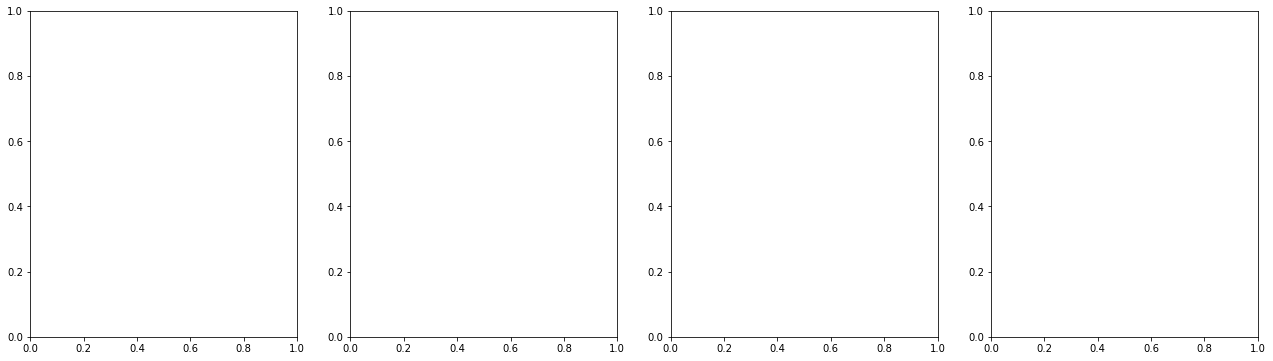

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
dog_images = training_dogs[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(dog_images[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
cat_images = training_cats[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(cat_images[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)

## Preprocess Data (from dataframe)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation

In [ ]:
test_cats[:3] # only file name

In [ ]:
training_cats
training_dogs
#############
test_cats
test_dogs

In [ ]:
train_paths = training_cats + training_dogs
train_labels = ['CAT' for _ in range(len(training_cats))] + ['DOG' for _ in range(len(training_dogs))]

pd.set_option('display.max_colwidth', 200) # 200글자 제한

In [ ]:
train_df = pd.DataFrame({'path':train_paths, 'label':train_labels})

In [ ]:
training_cats[:5] + training_dogs[:5]

In [ ]:
BATCH_SIZE = 32
train_generator = ImageDataGenerator(horizontal_flip = True, rescale=1/255.0) #Scale 조정 scale을 재조정하는데 255.0으로 나눌 것이다.
train_generator_iterator = train_generator.flow_from_directory(directory='./cat_and_dog/training_set/training_set', target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='binary') #binary label Encoding

# categorical, sparse, binary로 label을 encoding하는 것에 따라 loss도 바뀐다. ~~~_crossentropy 이런 모습의 loss

Found 8005 images belonging to 2 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale=1/255.0)
test_generator_iterator = train_generator.flow_from_directory(directory='./cat_and_dog/test_set/test_set', target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='binary')

Found 2023 images belonging to 2 classes.


* fetch some data

In [ ]:
image_array, label_array = next(train_generator_iterator)

In [ ]:
image_array.shape

(32, 224, 224, 3)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation, GlobalAveragePooling2D

In [ ]:
def build_extended_gap_model():
  tf.keras.backend.clear_session() #기존에 있던 모델 클리어

  input_tensor = Input(shape = (224,224, 3))
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #x = MaxPooling2D(pool_size=(2,2))(x)


  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)


  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  #x = Flatten()(x)
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  x = Dense(300, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.3)(x)
  output = Dense(1, activation='sigmoid')(x)

  model = Model(inputs=input_tensor, outputs=output)
  
  return model

In [ ]:
model = build_extended_gap_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0     

### Compile Model, Train

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_iterator, epochs=30)

Epoch 1/30
251/251 [==============================] - 520s 2s/step - loss: 0.6901 - accuracy: 0.5720
Epoch 2/30
251/251 [==============================] - 501s 2s/step - loss: 0.6474 - accuracy: 0.6134
Epoch 3/30
251/251 [==============================] - 494s 2s/step - loss: 0.6246 - accuracy: 0.6446
Epoch 4/30
120/251 [=============>................] - ETA: 4:19 - loss: 0.6192 - accuracy: 0.6635

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_generator_iterator)